> ## <font color = 'purple'> Import des bibliothèques </font>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import imblearn
from imblearn.over_sampling import SMOTE
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import metrics

In [9]:
#pip install imblearn
#pip install xgboost

In [6]:
df = pd.read_csv('BDD_nettoyé.csv')

In [7]:
df = df.drop("Unnamed: 0", axis = 1)

In [8]:
df.head()

,ID_Part_anonymisé,AGE_ANC_PART,departement.1,Age,Attrition,SITU_FAM_AVAN,CD_SEX,NB_CONTRAT_BAQ,NB_CONTRAT_Ass,NB_CONTRAT_eprgn,...,job_PERS.SER,"job_PROF,PRO",job_PROF.ADM,job_PROF.INF,job_PROFESSI,job_SS ACT.-,flux_max,flux_min,flux_mean,flux_med
0,9901.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,21295.66,912.1,5070.973333,1471.435
1,9902.0,25.0,1.0,24.340426,1.0,1.0,0.0,10.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2800.00,0.0,666.666667,125.000
2,9903.0,24.0,1.0,23.568977,0.0,1.0,1.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,70.00,10.0,20.000000,10.000
3,9904.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7110.00,30.0,1210.000000,30.000
4,9905.0,25.0,1.0,24.543583,0.0,1.0,1.0,8.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1500.00,0.0,250.000000,0.000


In [9]:
df.shape

(37959, 102)

In [10]:
print("Avant l'équilibrage, le compte des '1' : {}".format(sum(df['Attrition']==1)))
print("Avant l'équilibrage, le compte des '0' : {}".format(sum(df['Attrition']==0)))

Avant l'équilibrage, le compte des '1' : 2116
Avant l'équilibrage, le compte des '0' : 35843


In [11]:
ID = df['ID_Part_anonymisé']
X = df.drop(['ID_Part_anonymisé','Attrition'], axis = 1)

In [12]:
# standardiser les données
scaler = preprocessing.StandardScaler()
names = X.columns
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [13]:
scaled_df.shape

(37959, 100)

In [14]:
y = df['Attrition']

In [15]:
# Créer train et test
X_train,X_test,y_train,y_test = train_test_split(scaled_df,y, test_size = 0.3,random_state=42)

In [16]:
X_train.shape, y_train.shape

((26571, 100), (26571,))

> ### <font color = 'purple'> Tester des reglog, Random Forest, Gradient boosting,svc, xgboost </font>

LogisticRegression :


c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


L'évaluation du modèle est :                precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     10731
         1.0       0.57      0.07      0.13       657

    accuracy                           0.94     11388
   macro avg       0.76      0.54      0.55     11388
weighted avg       0.92      0.94      0.92     11388

DecisionTreeClassifier :
L'évaluation du modèle est :                precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10731
         1.0       0.00      0.00      0.00       657

    accuracy                           0.94     11388
   macro avg       0.47      0.50      0.49     11388
weighted avg       0.89      0.94      0.91     11388

Gradientboosting :
L'évaluation du modèle est :                precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     10731
         1.0       0.44      0.30      0.36       657

    accuracy                           0.94     

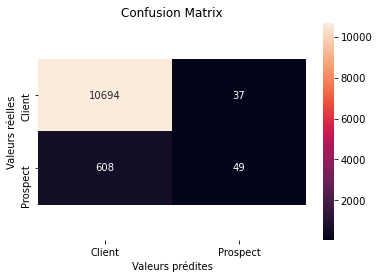

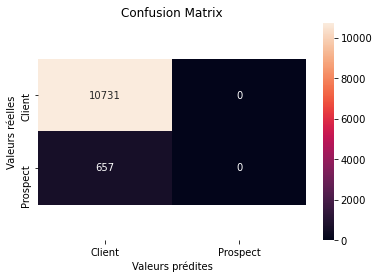

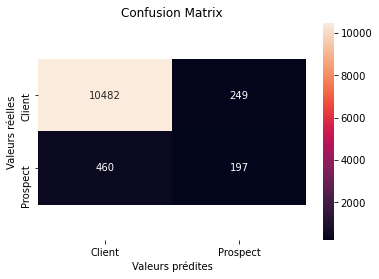

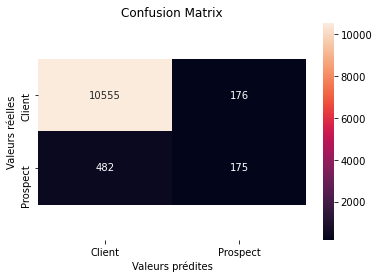

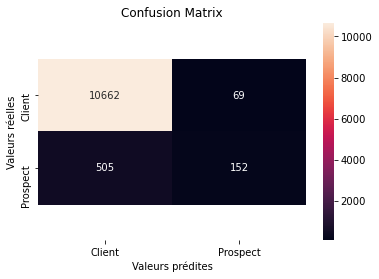

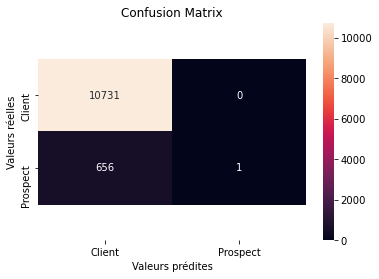

In [18]:
models = {'LogisticRegression':LogisticRegression(random_state=42),
         'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
         'Gradientboosting': GradientBoostingClassifier(n_estimators=500,learning_rate=1),
          'RandomForest':RandomForestClassifier(),
          'XGBoost':  XGBClassifier(),
          'SVC' : SVC(gamma='auto')
         }
#fonction de precision
def accu(y_test, y_pred, retu=False):
    report = classification_report(y_test, y_pred)
    if retu :
        return report
    else:
        print("L'évaluation du modèle est : ",report)
        
def Mat_confu(y_test,y_pred): 
    fig = plt.figure()
    # Matrice de confusion
    ax= plt.subplot()
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax = ax ,fmt='g'); #annot=True to annotate cells
    ax.set_xlabel('Valeurs prédites');ax.set_ylabel('Valeurs réelles'); 
    ax.set_title('Confusion Matrix'); 
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.xaxis.set_ticklabels(['Client', 'Prospect']); ax.yaxis.set_ticklabels(['Client', 'Prospect']);
    print('='*70)
   
        
def train_test_eval(models, x_train,y_train,x_test,y_test):
    for name,model in models.items():
        print(name,':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        Mat_confu(y_test,model.predict(x_test))
        print('='*70)
        
train_test_eval(models,X_train,y_train,X_test,y_test)

- On ramrque que random forest et gradient boosting donne de meilleurs résultats en les comparents aux autres

In [58]:
#pip install scikit-plot

In [1]:
# import scikitplot as skplt
# import matplotlib.pyplot as plt

# y_true = y_test
# y_probas = model.predict_proba(X_test)
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


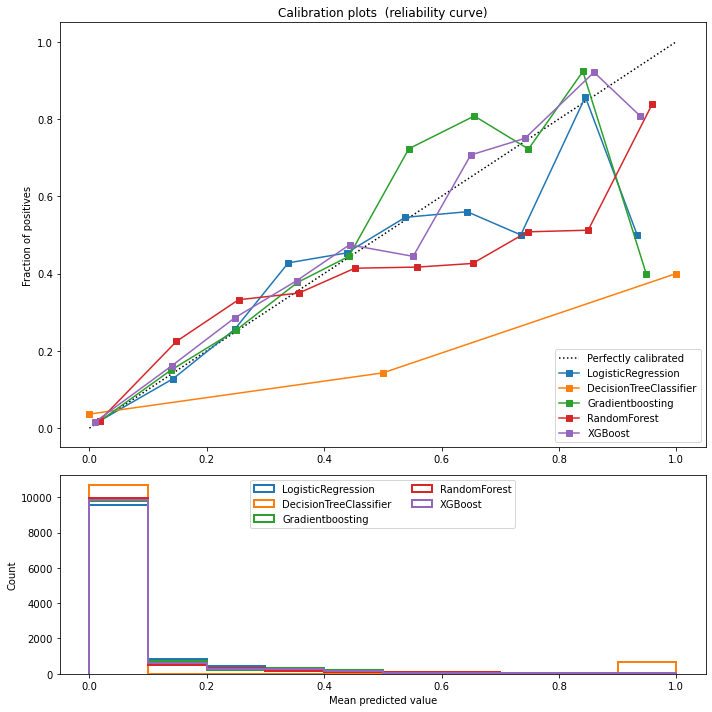

In [19]:
# Plot calibration plots
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label='Perfectly calibrated')

for clf, name in [(LogisticRegression(),'LogisticRegression'),
                 (DecisionTreeClassifier(),'DecisionTreeClassifier'),
                 (GradientBoostingClassifier(),'Gradientboosting'),
                  (RandomForestClassifier(),'RandomForest'),
                  (XGBClassifier(),'XGBoost')] :
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [20]:
def ROC(models, x_train,y_train,x_test,y_test):
    for name,model in models.items():
        model.fit(x_train,y_train)
        probs = model.predict_proba(X_test)
        preds = probs[:,1]
        fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate(Sensibilité)')
        plt.xlabel('False Positive Rate (1-spécificté)')
        plt.title(name+' Courbe de ROC')
        plt.show()
#     print('='*70)

c:\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


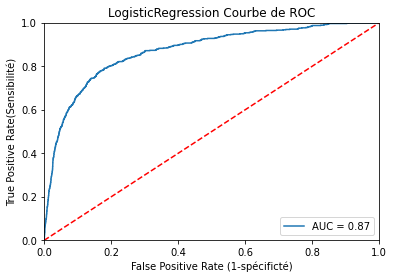

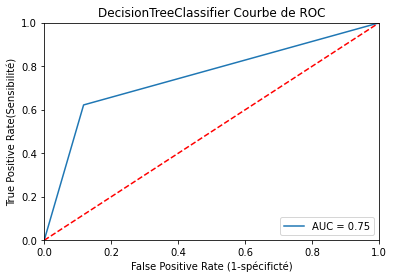

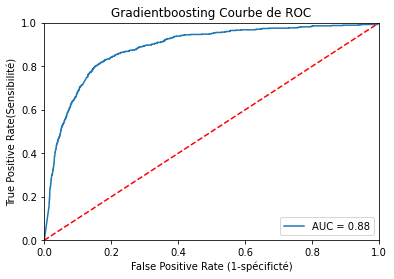

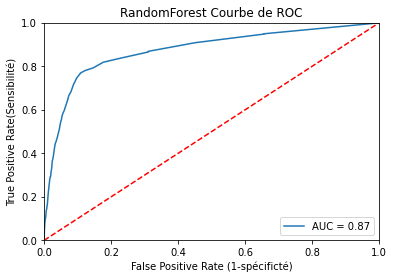

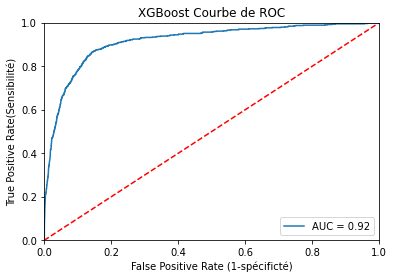

AttributeError: predict_proba is not available when  probability=False

In [23]:
ROC(models, X_train,y_train,X_test,y_test)